## TRANSATION AND PRODUCT DATA ANALYSIS

* Checking data types, and cast DAY, QUANTITY, STORE_ID, and WEEK_NO columns to the smallest appropiate datatypes.
* Check or missing data.
* How many unique households and products are there in the data? 

In [1]:
import pandas as pd
import numpy as np

In [2]:
transactions = pd.read_csv("........../project_transactions.csv")

In [3]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [4]:
transactions.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int64  
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(7)
memory usage: 180.1 MB


In [5]:
# Reduced memory usage by 33MB after converting to correct datatypes
transactions = pd.DataFrame(transactions).astype({
    'DAY': 'Int16',
    'QUANTITY': 'Int32',
    'STORE_ID': 'Int32',
    'WEEK_NO': 'Int16'
})

In [6]:
transactions.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                Int16  
 3   PRODUCT_ID         int64  
 4   QUANTITY           Int32  
 5   SALES_VALUE        float64
 6   STORE_ID           Int32  
 7   RETAIL_DISC        float64
 8   WEEK_NO            Int16  
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: Int16(2), Int32(2), float64(4), int64(3)
memory usage: 147.4 MB


In [7]:
# Checking missing value counts
transactions.isna().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [8]:
# Checking unique households and products
transactions[["household_key", "PRODUCT_ID"]].nunique()

household_key     2099
PRODUCT_ID       84138
dtype: int64

### Column Creation
* Capture the total discount by row
* Percentage discount
* If percentage discount is greater than 1, set to 1. If it is less than 1 set it to 0.
* Drop individual discount column

In [9]:
# Total discount
transactions["total_discount"] = transactions["RETAIL_DISC"] + transactions["COUPON_DISC"]

In [10]:
# Discount percentage
transactions["percentage_discount"] = (transactions["total_discount"]/transactions["SALES_VALUE"]).abs()

In [11]:
# If percentage discount is greater than 1, set to 1. If it is less than 1 set it to 0.
transactions["percentage_discount"] = (
    transactions["percentage_discount"]
    .where(transactions["percentage_discount"] < 1, 1.0)
    .where(transactions["percentage_discount"] > 0, 0)
)

In [12]:
transactions = transactions.drop(["RETAIL_DISC", "COUPON_DISC", "COUPON_MATCH_DISC"], axis=1)

In [13]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.000000


### Statistical analysis
* Calculate total sales
* Calculate total discount
* Overall oercentage discount
* Total quantity sold
* Max quantity sold and does this have high discount percentage
* Total sales value per basket
* Total sales value per household
* Highest quantity sold for a single item in a single row

In [14]:
# Total Sales
transactions["SALES_VALUE"].sum()

6666243.499999999

In [15]:
# Total discount
transactions["total_discount"].sum()

-1178658.0799999998

In [16]:
# Overall percentage discount
transactions["total_discount"].sum()/transactions["SALES_VALUE"].sum()

-0.1768099350106248

In [17]:
# Average percentage discount
transactions["percentage_discount"].mean()

0.20732444073964212

In [18]:
# Total Quantity sold
transactions["QUANTITY"].sum()

216713611

In [19]:
# Max quantity sold in a row
transactions["QUANTITY"].max()

89638

In [20]:
transactions.loc[transactions["QUANTITY"].argmax()]

household_key                  630.0
BASKET_ID              34749153595.0
DAY                            503.0
PRODUCT_ID                 6534178.0
QUANTITY                     89638.0
SALES_VALUE                    250.0
STORE_ID                       384.0
WEEK_NO                         73.0
total_discount                -13.45
percentage_discount           0.0538
Name: 1442095, dtype: Float64

In [21]:
# Sales value per basket
transactions["SALES_VALUE"].sum()/transactions["BASKET_ID"].nunique()

28.61797938516092

In [22]:
# Sales value per households
transactions["SALES_VALUE"].sum()/transactions["household_key"].nunique()

3175.9140066698424

### Household analysis
* Plot distribution of total sales value purcahsed at the household level
* What are the top 10 households by quantity purchased?
* What are the top 10 households by sales value?
* Plot total sales value for top 10 households by value

<AxesSubplot:ylabel='Frequency'>

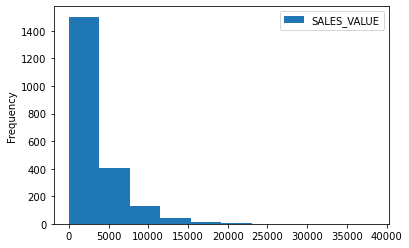

In [23]:
# Plot distribution of total sales value purcahsed at the household level
transactions.groupby("household_key").agg({"SALES_VALUE":"sum"}).plot.hist()

In [27]:
# Top 10 households by value purchased
top10_value = transactions.groupby("household_key").agg({"SALES_VALUE":"sum"}).sort_values("SALES_VALUE", ascending=False).iloc[:10]

In [28]:
# Top 10 households by quantity purchased
top10_quantity = transactions.groupby("household_key").agg({"QUANTITY":"sum"}).sort_values("QUANTITY", ascending=False).iloc[:10]

In [29]:
top10_value

,SALES_VALUE
household_key,
1023,38319.79
1609,27859.68
1453,21661.29
1430,20352.99
718,19299.86
707,19194.42
1653,19153.75
1111,18894.72
982,18790.34


In [30]:
top10_quantity

,QUANTITY
household_key,
1023,4479917
755,3141769
1609,2146715
13,1863829
1430,1741892
1527,1734632
1762,1669880
707,1640193
1029,1496204


<AxesSubplot:xlabel='household_key'>

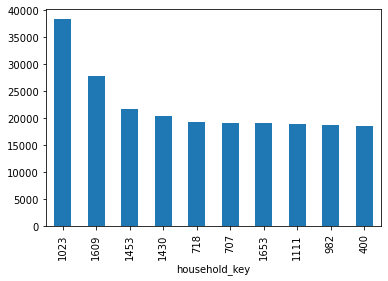

In [32]:
top10_value["SALES_VALUE"].sort_values(ascending = False).plot.bar()

### Product Analysis
* Which product has most sakles by sales_value?
* Did top selling items have a higher than average discount rate?
* names of the top 10 selling products
* What was the most common product_id among rows with households in top 10 households by sales value


In [34]:
# Top 10 products by sales
top10_products = (transactions.groupby(["PRODUCT_ID"])
                .agg({"SALES_VALUE" : "sum"})
                .sort_values("SALES_VALUE", ascending = False)
                .iloc[:10]
                 )

In [35]:
top10_products

,SALES_VALUE
PRODUCT_ID,
6534178,420154.13
6533889,42339.31
1029743,33894.75
1082185,24149.79
6533765,23831.14
6534166,23755.70
1106523,22931.01
916122,22749.02
995242,21229.72


<AxesSubplot:ylabel='PRODUCT_ID'>

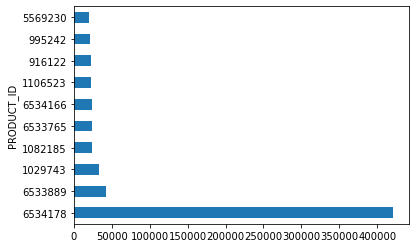

In [37]:
# Plot 10 products by sale values
top10_products["SALES_VALUE"].sort_values(ascending = False).plot.barh()

In [38]:
discount_rate = (transactions.query("PRODUCT_ID in @top10_products.index").loc[:,"total_discount"].sum()
                /transactions.query("PRODUCT_ID in @top10_products.index").loc[:,"SALES_VALUE"].sum())

In [39]:
discount_rate

-0.10331267387397927

In [41]:
transactions.loc[:,"percentage_discount"].mean()

0.20732444073964212

In [42]:
products = pd.read_csv("............/product.csv")

In [44]:
products.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [47]:
# Top 10 product in households
top10_product_hh = (transactions.query("household_key in @top10_value.index")
                    .loc[:,"PRODUCT_ID"]
                    .value_counts().iloc[:10].index
)

In [48]:
top10_product_hh

Int64Index([1082185, 1029743, 6534178, 6533889, 1127831,  951590,  860776,
            1106523,  981760, 9677202],
           dtype='int64')

In [49]:
common_product_hh = (transactions.query("household_key in @top10_value.index")
                    .loc[:,"PRODUCT_ID"]
                    .value_counts()
)
common_product_hh

1082185     576
1029743     573
6534178     561
6533889     418
1127831     230
           ... 
1086818       1
1060912       1
981797        1
864988        1
17937077      1
Name: PRODUCT_ID, Length: 13878, dtype: int64

In [51]:
products.query("PRODUCT_ID in @top10_product_hh")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
10630,860776,2,PRODUCE,National,VEGETABLES - ALL OTHERS,CUCUMBERS,36 CT
20973,951590,910,GROCERY,National,BAKED BREAD/BUNS/ROLLS,MAINSTREAM WHITE BREAD,20 OZ
24250,981760,69,GROCERY,Private,EGGS,EGGS - X-LARGE,1 DZ
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
40600,1127831,5937,PRODUCE,National,BERRIES,STRAWBERRIES,16 OZ
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
68952,9677202,69,GROCERY,Private,PAPER TOWELS,PAPER TOWELS & HOLDERS,


In [53]:
# Top 10 product name
products.query("PRODUCT_ID in @top10_products.index")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
16863,916122,4314,MEAT,National,CHICKEN,CHICKEN BREAST BONELESS,
25754,995242,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
53097,5569230,1208,GROCERY,National,SOFT DRINKS,SOFT DRINKS 12/18&15PK CAN CAR,12 OZ
57171,6533765,69,KIOSK-GAS,Private,FUEL,GASOLINE-REG UNLEADED,
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57216,6534166,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
